In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import spikeinterface as si
import matplotlib.pyplot as plt
import os
from matplotlib.backends.backend_pdf import PdfPages

from tqdm import tqdm
import pickle
from scipy.stats import  pearsonr
import neo
from quantities import ms
from elephant.statistics import instantaneous_rate
from elephant.kernels import GaussianKernel

#Pink dark ED7B85
#Pink light F5B5B3
#Blue dark 5E9FD1
#Blue light A6C3E5

- Mouse6

In [ ]:
date_order = ['021322', '022522', '031722', '042422', 
              '052422', '062422', '072322', '082322', 
              '092422', '102122', '112022', '122022', 
              '022223', '032123', '042323']

date_order_num = [int(i) for i in date_order]

In [9]:
with open("/media/ubuntu/sda/data/paper_architecture/01_closed_loop/mouse6/pkl/cluster_042323.pkl", "rb") as f:
    cluster_inf = pickle.load(f)

with open("/media/ubuntu/sda/data/paper_architecture/01_closed_loop/mouse6/pkl/spike_042323.pkl", 'rb') as f:
    spike_inf = pickle.load(f)


cluster_inf = cluster_inf[cluster_inf['date'] != '012123']
spike_inf = spike_inf[spike_inf['date'] != '012123']

In [17]:
cluster_inf['probe_group'].values

array(['5', '5', '5', '5', '1', '5', '5', '4', '4', '4', '4', '2', '2',
       '4', '4', '3', '3', '3', '3', '3', '3', '5', '5', '1', '5', '5',
       '4', '4', '4', '4', '2', '2', '4', '4', '3', '3', '3', '3', '3',
       '3', '5', '5', '5', '1', '1', '5', '5', '5', '4', '4', '4', '4',
       '2', '2', '4', '4', '3', '3', '3', '3', '3', '3', '5', '5', '1',
       '1', '5', '5', '5', '4', '4', '4', '4', '2', '2', '4', '4', '3',
       '3', '3', '3', '3', '5', '5', '5', '1', '1', '5', '5', '5', '4',
       '4', '4', '4', '2', '2', '4', '4', '3', '3', '3', '3', '3', '3',
       '5', '5', '5', '1', '1', '5', '5', '5', '4', '4', '4', '4', '2',
       '2', '4', '4', '3', '3', '3', '3', '3', '3', '5', '5', '5', '1',
       '5', '5', '5', '4', '4', '4', '4', '2', '2', '4', '4', '3', '3',
       '3', '3', '3', '3', '5', '5', '5', '1', '5', '5', '4', '4', '4',
       '4', '2', '2', '4', '4', '3', '3', '3', '3', '3', '3', '5', '5',
       '5', '1', '1', '5', '5', '5', '4', '4', '4', '4', '2', '2

In [20]:
date_markers = {
    '021322': 'o',
    '082322': 's',
    '122022': 'D',
    '042323': '^'
}

unique_neurons = cluster_inf['Neuron'].unique()
palette = sns.color_palette('tab10', len(unique_neurons))
neuron_colors = {neuron: color for neuron, color in zip(unique_neurons, palette)}

with PdfPages('/media/ubuntu/sda/data/paper_architecture/02_consistency/figure/probe_group_view.pdf') as pdf:
    temp = cluster_inf[cluster_inf['probe_group'] == '1']
    fig, ax = plt.subplots(figsize=(3, 5))
    for date, marker in date_markers.items():
        date_data = temp[temp['date'] == date]
        sns.scatterplot(
            x='position_1', y='position_2', hue='Neuron', style='date',
            markers={date: marker}, data=date_data, ax=ax, palette=neuron_colors, s=300
        )
    ax.set_title(f'Probe Group: {1}')
    ax.set_xticks([])
    ax.set_yticks([])
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_xlim(-10, 60)
    ax.set_ylim(-10, 110)
    ax.legend().remove()
    pdf.savefig(fig)
    plt.close(fig)

    temp = cluster_inf[cluster_inf['probe_group'] == '2']
    fig, ax = plt.subplots(figsize=(3, 5))
    for date, marker in date_markers.items():
        date_data = temp[temp['date'] == date]
        sns.scatterplot(
            x='position_1', y='position_2', hue='Neuron', style='date',
            markers={date: marker}, data=date_data, ax=ax, palette=neuron_colors, s=300
        )
    ax.set_title(f'Probe Group: {2}')
    ax.set_xticks([])
    ax.set_yticks([])
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_xlim(140, 210)
    ax.set_ylim(190, 310)
    ax.legend().remove()
    pdf.savefig(fig)
    plt.close(fig)

    temp = cluster_inf[cluster_inf['probe_group'] == '3']
    fig, ax = plt.subplots(figsize=(3, 5))
    for date, marker in date_markers.items():
        date_data = temp[temp['date'] == date]
        sns.scatterplot(
            x='position_1', y='position_2', hue='Neuron', style='date',
            markers={date: marker}, data=date_data, ax=ax, palette=neuron_colors, s=300
        )
    ax.set_title(f'Probe Group: {3}')
    ax.set_xticks([])
    ax.set_yticks([])
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_xlim(240, 360)
    ax.set_ylim(390, 510)
    ax.legend().remove()
    pdf.savefig(fig)
    plt.close(fig)

    temp = cluster_inf[cluster_inf['probe_group'] == '4']
    fig, ax = plt.subplots(figsize=(3, 5))
    for date, marker in date_markers.items():
        date_data = temp[temp['date'] == date]
        sns.scatterplot(
            x='position_1', y='position_2', hue='Neuron', style='date',
            markers={date: marker}, data=date_data, ax=ax, palette=neuron_colors, s=300
        )
    ax.set_title(f'Probe Group: {4}')
    ax.set_xticks([])
    ax.set_yticks([])
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_xlim(440, 510)
    ax.set_ylim(190, 310)
    ax.legend().remove()
    pdf.savefig(fig)
    plt.close(fig)

    temp = cluster_inf[cluster_inf['probe_group'] == '5']
    fig, ax = plt.subplots(figsize=(3, 5))
    for date, marker in date_markers.items():
        date_data = temp[temp['date'] == date]
        sns.scatterplot(
            x='position_1', y='position_2', hue='Neuron', style='date',
            markers={date: marker}, data=date_data, ax=ax, palette=neuron_colors, s=300
        )
    ax.set_title(f'Probe Group: {5}')
    ax.set_xticks([])
    ax.set_yticks([])
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_xlim(590, 660)
    ax.set_ylim(-10, 110)
    ax.legend().remove()
    pdf.savefig(fig)
    plt.close(fig)

In [32]:
displacement_df_position_1 = pd.DataFrame()
displacement_df_position_2 = pd.DataFrame()

for neuron in cluster_inf['Neuron'].unique():
    temp = cluster_inf[cluster_inf['Neuron'] == neuron]
    displacement_1 = []
    displacement_2 = []
    for date in date_order:
        displacement_1.append(temp[temp['date'] == date]['position_1'].values.mean() - temp[temp['date'] == '021322']['position_1'].values.mean())
        displacement_2.append(temp[temp['date'] == date]['position_2'].values.mean() - temp[temp['date'] == '021322']['position_2'].values.mean())
    displacement_df_position_1[neuron] = displacement_1
    displacement_df_position_2[neuron] = displacement_2

months_to_plot = [2, 6, 8, 12, 15]  
n_months = len(months_to_plot)

colors = sns.color_palette("viridis", n_colors=n_months)

with PdfPages('/media/ubuntu/sda/data/paper_architecture/02_consistency/figure/displacement_kde.pdf') as pdf:
    for idx, m in enumerate(months_to_plot):
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.plot(0, 0, 'ko', markersize=8, zorder=10)  
        data_month = pd.concat((
            displacement_df_position_1.iloc[m-1, :], 
            displacement_df_position_2.iloc[m-1, :]), axis=1)
        
        sns.kdeplot(
            x = displacement_df_position_1.iloc[m-1, :],
            y=displacement_df_position_2.iloc[m-1, :],
            ax=ax,
            linewidth=1.5,
            fill=False,  
            label=f'Month {m}',
            thresh=0.25,
            levels=6,
            common_norm=False  
        )

        ax.set_xlabel('Position Value', fontsize=12)
        ax.set_ylabel('Density', fontsize=12)
        ax.set_ylim(-10, 10)
        ax.set_xlim(-10, 10)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.tick_params(axis='both', which='major', labelsize=10)


        plt.tight_layout()
        pdf.savefig()
        plt.close()

In [33]:
date_groups = cluster_inf.groupby('date')
result_matrix = {}

for date, group in date_groups:
    neurons = group.set_index('Neuron')[['position_1', 'position_2']]
    neuron_list = sorted(neurons.index.unique())
    n = len(neuron_list)
    
    dist_matrix = np.zeros((n, n), dtype=float)
    
    for i in range(n):
        for j in range(n):
            if i == j:
                dist_matrix[i][j] = 0 
            else:
                pos_i = neurons.loc[neuron_list[i]]
                pos_j = neurons.loc[neuron_list[j]]
                dist = np.sqrt((pos_i['position_1'].mean()-pos_j['position_1'].mean())**2 + (pos_i['position_2'].mean()-pos_j['position_2'].mean())**2)
                dist_matrix[i][j] = dist
    
    result_matrix[date] = pd.DataFrame(dist_matrix, index=neuron_list)

In [34]:

displacement_dict = {}
for probe in cluster_inf['probe_group']:
    temp = cluster_inf[cluster_inf['probe_group'] == probe]
    month_groups = temp.groupby('date')

    month_pairs = [('021322', '022522'),
                ('021322', '062422'),
                ('021322', '082322'),
                ('021322', '122022'),
                ('021322', '042323')]

    all_neurons = sorted(temp['Neuron'].unique())
    n_neurons = len(all_neurons)
    n_pairs = len(month_pairs)

    distance_matrix = np.full((n_pairs, n_neurons, n_neurons), np.nan)

    for pair_idx, (month_a, month_b) in enumerate(month_pairs):
        group_a = month_groups.get_group(month_a).set_index('Neuron')[['position_1', 'position_2']]
        group_b = month_groups.get_group(month_b).set_index('Neuron')[['position_1', 'position_2']]
        
        for i, neuron_i in enumerate(all_neurons):
            for j, neuron_j in enumerate(all_neurons):
                if (neuron_i in group_a.index) and (neuron_j in group_b.index):
                    pos_i = group_a.loc[neuron_i]
                    pos_j = group_b.loc[neuron_j]
                    distance = np.sqrt((pos_i['position_1'].mean()-pos_j['position_1'].mean())**2 + (pos_i['position_2'].mean()-pos_j['position_2'].mean())**2)
                    distance_matrix[pair_idx, i, j] = distance
    displacement_dict[probe] = distance_matrix

In [35]:
with PdfPages("/media/ubuntu/sda/data/paper_architecture/02_consistency/figure/hist_displacement.pdf") as pdf:
    for month in range(5):
        fig, ax = plt.subplots(figsize=(4, 4))
        df_1 = []
        df_2 = []

        for probe in displacement_dict.keys():
            df_1.append([displacement_dict[probe][month, i, i] for i in range(displacement_dict[probe].shape[1])])
            df_2.append(displacement_dict[probe].flatten())

        df_1 = flattened_list = np.concatenate(df_1)
        df_2 = flattened_list = np.concatenate(df_2)
        sns.ecdfplot(df_1, color='#2980b9', label='Within-neuron displacement', linewidth=2, ax=ax)
        sns.ecdfplot(df_2, color='orange', label='Across-neuron displacement', linewidth=2, ax=ax)

        ax.spines['top'].set_visible(False) 
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(1.5)  
        ax.spines['bottom'].set_linewidth(1.5)
        pdf.savefig()
        plt.close()

In [ ]:
trigger_time = pd.read_csv("/media/ubuntu/sda/data/paper_architecture/02_consistency/trigger/trigger_time_mouse6.tsv", sep = '\t').iloc[:, 1:]
trigger_time = trigger_time[trigger_time['date'] != 12123]

In [42]:
firing_rate_dict = {}
correlation_dict = {}

for date in spike_inf['date'].unique():
    spike_inf_temp = spike_inf[spike_inf['date'] == date]
    firing_rate_dict[date] = {}
    trigger_time_temp = trigger_time[trigger_time['date'] == int(date)]
    for image in trigger_time_temp['image'].unique():
        firing_rate_dict[date][image] = pd.DataFrame()
        trigger_time_temp_temp = trigger_time_temp[trigger_time_temp['image'] == image]
        for image_order in trigger_time_temp_temp['order'].sort_index().values.tolist():
            trigger_time_temp_temp_temp = trigger_time_temp_temp[trigger_time_temp_temp['order'] == image_order]
            temp = spike_inf_temp[(spike_inf_temp['time'] > int(trigger_time_temp_temp_temp['start'].values)) & (spike_inf_temp['time'] < int(trigger_time_temp_temp_temp['end'].values))]
            firing_rate_dict[date][image] = pd.concat((firing_rate_dict[date][image], pd.DataFrame(temp['Neuron'].value_counts()).sort_index()), axis=1)
        firing_rate_dict[date][image] = firing_rate_dict[date][image].fillna(0)

    correlation_dict[date] = {}
    for key in sorted(list(firing_rate_dict[date].keys())):
        num = firing_rate_dict[date][key].shape[1]
        correlation_dict[date][key] = np.zeros((num, num))
        for i in range(num):
            for j in range(num):
                correlation_dict[date][key][i, j], _ = pearsonr(firing_rate_dict[date][key].iloc[:, i].values.tolist(), firing_rate_dict[date][key].iloc[:, j].values.tolist())

In [46]:
outlier = []
for date in correlation_dict.keys():
    for image in range(1, 118):
        mean = (correlation_dict[date][image].sum(axis = 0)-1)/(len(correlation_dict[date][image]) - 1)
        for i in range(len(mean)):
            if mean[i] <= 0.6:
                outlier.append(f'{date}_{image}_{i}')

In [47]:
import pickle
with open('/media/ubuntu/sda/data/paper_architecture/02_consistency/outlier_mouse6.pkl', 'wb') as f:
    pickle.dump(outlier, f)

In [50]:
correlation_mean = pd.DataFrame()
for date in correlation_dict.keys():
    temp = []
    for image, df in correlation_dict[date].items():
        df = df.mean().mean()
        temp.append(df)
    correlation_mean = pd.concat((correlation_mean, pd.DataFrame(temp, columns=[date])),axis=1)

correlation_mean = correlation_mean[date_order]

In [57]:
with PdfPages("/media/ubuntu/sda/data/paper_architecture/02_consistency/figure/similarity_within_dates.pdf") as pdf:
    mean = correlation_mean.mean(axis=0)
    std = correlation_mean.std(axis=0)

    plt.figure(figsize=(6, 3))
    sns.lineplot(x = range(15),
                 y = mean * 100,
                 color = 'black')
    sns.scatterplot(x = range(15),
                    y = mean * 100,
                    size=30,
                    color = "black",
                    legend=False)
    plt.fill_between(x  = range(15), 
                     y1=(mean - std) * 100,
                     y2=(mean + std) * 100,
                     color = 'grey',
                     alpha = 0.2)
    plt.xticks([])
    plt.ylim(0, 100)
    plt.ylabel(None)
    pdf.savefig()
    plt.close()

In [65]:
mean_similarity_dict = {}
for date in spike_inf['date'].unique():
    mean_similarity_dict[date] = {}
    for key in sorted(list(firing_rate_dict[date].keys())):
        mean_similarity = np.mean(correlation_dict[date][key])
        mean_similarity_dict[date][key] = mean_similarity

mean_similarity_df = pd.DataFrame(mean_similarity_dict).T

mean_similarity_df = mean_similarity_df.loc[date_order]
mean_similarity_df.index = date_order  

with PdfPages('/media/ubuntu/sda/data/paper_architecture/02_consistency/figure/ER_similarity_lineplot.pdf') as pdf:
    fig, ax = plt.subplots(figsize=(12, 8))
    
    for key in mean_similarity_df.columns:
        ax.plot(mean_similarity_df.index, mean_similarity_df[key], color = '#F5B5B3')
    
    sns.lineplot(x = range(15),
                 y = mean,
                 color = 'black', linewidth = 4)
    
    ax.set_title('Mean Similarity Over Time for Each Image')
    ax.set_ylim(0, 1)    
    pdf.savefig(fig)
    plt.close(fig)

In [192]:
image_mean_spike_rate_data = {}
gk = GaussianKernel(25 * ms)

total_duration = 20000  

for image in range(1, 118):
    image_dict = {}
    
    for date in date_order:
        neuron_data = []
        
        for neuron in spike_inf['Neuron'].unique():
            neuron_df = spike_inf[spike_inf['Neuron'] == neuron]
            trigger_time_temp = trigger_time[(trigger_time['image'] == image) 
                                            & (trigger_time['date'] == int(date))]
            
            trial_rates = [] 
            
            for _, row in trigger_time_temp.iterrows():
                start = row['start'] - 5000
                end = row['end'] + 10000
                
                filtered_spikes = neuron_df[(neuron_df['date'] == date) 
                                          & (neuron_df['time'] >= start)
                                          & (neuron_df['time'] <= end)]
                
                relative_spikes = filtered_spikes['time'] - start
                relative_spikes = relative_spikes.values / 10
                temp_spiketrain = neo.SpikeTrain(relative_spikes.astype(int) * ms, t_stop=2000, t_start=0)
                inst_rate = instantaneous_rate(temp_spiketrain, kernel=gk, sampling_period=10*ms).magnitude
                trial_rates.append(inst_rate)
            
            if trial_rates:
                mean_rate = np.mean(trial_rates, axis=0)
            
            neuron_data.append(mean_rate)
        
        neuron_data = np.stack(neuron_data)
        image_dict[date] = neuron_data
    
    image_mean_spike_rate_data[image] = image_dict

In [193]:
with open("/media/ubuntu/sda/data/paper_architecture/02_consistency/image_mean_spike_rate_data.pkl", 'wb') as f:
    pickle.dump(image_mean_spike_rate_data, f)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (100,) and arg 2 with shape (200,).

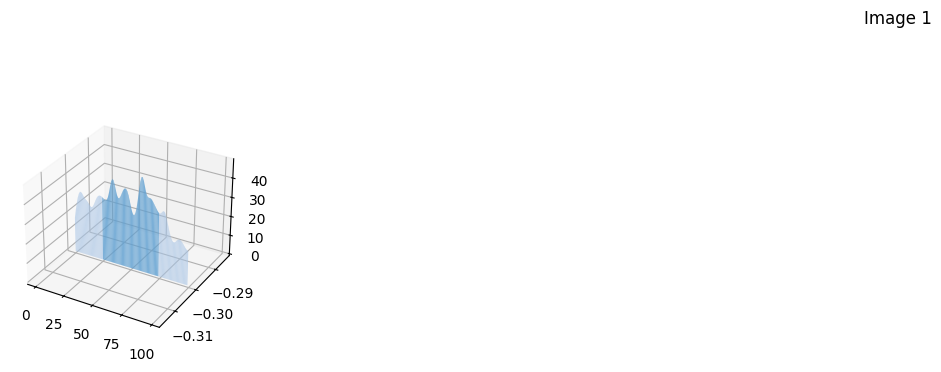

In [194]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def create_fill_polygons(x, z, y_pos, color, alpha=0.6):
    """
    创建填充多边形的3D集合
    """
    verts = []
    for i in range(len(x)-1):
        verts.append([
            (x[i], y_pos-0.3, 0),    
            (x[i], y_pos-0.3, z[i]), 
            (x[i+1], y_pos-0.3, z[i+1]),
            (x[i+1], y_pos-0.3, 0), 
            (x[i], y_pos-0.3, 0)    
        ])
    return Poly3DCollection(verts, alpha=alpha, facecolors=color, edgecolors='none')

def plot_neuron_3d_fill(ax, time_bins, values, y_pos):
    """
    绘制单个神经元的3D填充折线图
    """
    n_bins = len(time_bins)
    q1 = n_bins//4 
    q3 = 3*n_bins//4 
    
    x_deep = time_bins[q1:q3]
    z_deep = values[q1:q3]
    deep_poly = create_fill_polygons(x_deep, z_deep, y_pos, '#5E9FD1', alpha=0.8)
    ax.add_collection3d(deep_poly)
    
    if q1 > 0:
        x_light1 = time_bins[:q1 + 1]
        z_light1 = values[:q1 + 1]
        light_poly1 = create_fill_polygons(x_light1, z_light1, y_pos, '#A6C3E5')
        ax.add_collection3d(light_poly1)
    
    if q3 < n_bins:
        x_light2 = time_bins[q3 - 1:]
        z_light2 = values[q3 - 1:]
        light_poly2 = create_fill_polygons(x_light2, z_light2, y_pos, '#A6C3E5')
        ax.add_collection3d(light_poly2)
    
    ax.plot(time_bins, [y_pos - 0.3] * len(time_bins), values, 
           color='black', lw=1.8, alpha=0.95)

def generate_filled_pdf_improved(image_data, target_dates, filename):
    """
    参数:
    image_data: 字典，第一级key为image，第二级key为date，值为(n_neuron, 100, 1)的numpy数组
    target_dates: 要绘制的日期列表
    filename: 输出PDF文件名
    """
    with PdfPages(filename) as pdf:
        for img_num, img_data in image_data.items():
            sample_date = next(iter(img_data.keys()))
            n_neurons = img_data[sample_date].shape[0]
            
            n_cols = int(np.ceil(np.sqrt(n_neurons)))
            n_rows = int(np.ceil(n_neurons / n_cols))
            
            fig = plt.figure(figsize=(n_cols * 5, n_rows * 3.5))
            fig.suptitle(f'Image {img_num}', y=0.95, fontsize=12)
            
            time_bins = np.arange(100)
            
            for neuron_idx in range(n_neurons):
                ax = fig.add_subplot(n_rows, n_cols, neuron_idx + 1, projection='3d')
                
                for y_pos, date in enumerate(target_dates):
                    if date in img_data:
                        values = img_data[date][neuron_idx, :, 0]
                        
                        plot_neuron_3d_fill(ax, time_bins, values, y_pos)
                
                ax.set_xlim(time_bins.min(), time_bins.max())
                ax.set_ylim(-0.5, len(target_dates) - 0.5)
                ax.set_zlim(0, np.max([img_data[d][neuron_idx, :, 0].max() for d in target_dates if d in img_data]) * 1.2)
                
                ax.set_yticks([])
                ax.set_yticklabels([])
                ax.set_xticks([])
                ax.set_xticklabels([])
                ax.set_zticks([])
                ax.set_zticklabels([])

                
                ax.set_title(f'Neuron {neuron_idx + 1}', fontsize=9, pad=8)
                ax.grid(False)
                ax.set_box_aspect((1, 2.1, 0.9))
                ax.view_init(elev=35, azim=-60)
                ax.set_facecolor('white')
                ax.xaxis.pane.set_edgecolor('white')
                ax.yaxis.pane.set_edgecolor('white')
                ax.zaxis.pane.set_edgecolor('white')
                
                ax.xaxis.pane.fill = False
                ax.yaxis.pane.fill = False
                ax.zaxis.pane.fill = False
                
                ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
                ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
                ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
                
                ax.set_facecolor('white')
                fig.patch.set_facecolor('white')
                
                ax.set_xticks([])
                ax.set_zticks([])
            
            plt.tight_layout()
            pdf.savefig(fig, bbox_inches='tight', facecolor='white', edgecolor='none')
            plt.close()
            

generate_filled_pdf_improved(image_mean_spike_rate_data, ['021322', '022522', '042422', '062422', '082322', '102122', '122022', '042323'], "/media/ubuntu/sda/data/paper_architecture/02_consistency/figure/neural_response_3d_month1_8.pdf")


In [190]:
neuron_reaction = {}
image_id = {}
gk = GaussianKernel(25 * ms)

neuron_order = spike_inf['Neuron'].unique()

for date in date_order:
    neuron_reaction[date] = []
    image_id[date] = []

    trigger_time_temp = trigger_time[(trigger_time['date'] == int(date))]
    for _, row in trigger_time_temp.iterrows():
        start = row['start'] - 5000
        end = row['end'] + 10000
        image_id[date].append(row['image'])

        spike_inf_temp = spike_inf[(spike_inf['date'] == date) 
                                    & (spike_inf['time'] >= start)
                                    & (spike_inf['time'] <= end)]
        
        neuron_rates = []
        for neuron in neuron_order:
            filtered_spikes = spike_inf_temp[spike_inf_temp['Neuron'] == neuron]
            relative_spikes = filtered_spikes['time'] - start
            relative_spikes = relative_spikes.values / 10
            temp_spiketrain = neo.SpikeTrain(relative_spikes.astype(int) * ms, t_stop=2000, t_start=0)
            inst_rate = instantaneous_rate(temp_spiketrain, kernel=gk, sampling_period=10*ms).magnitude
            neuron_rates.append(inst_rate)
        
        neuron_reaction[date].append(np.stack(neuron_rates))
